In [128]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.activations import sigmoid
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [129]:
data = keras.datasets.mnist.load_data()

In [130]:
(X_train,y_train),(X_test,y_test) = data

In [131]:
print(f"X_train.shape : {X_train.shape}")
print(f"X_test.shape : {X_test.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"y_test.shape : {y_train.shape}")

X_train.shape : (60000, 28, 28)
X_test.shape : (10000, 28, 28)
y_train.shape : (60000,)
y_test.shape : (60000,)


In [132]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [133]:
X_train[0].shape

(28, 28)

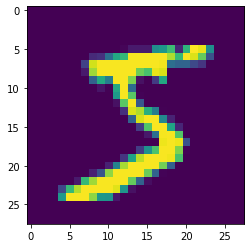

In [134]:
plt.imshow(X_train[0])
plt.show()

5


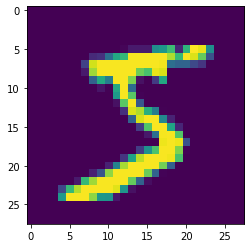

0


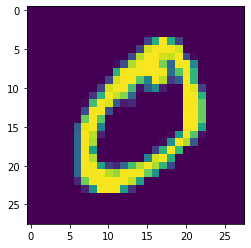

4


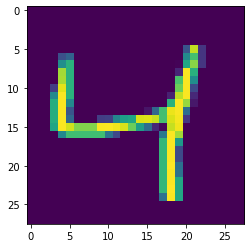

1


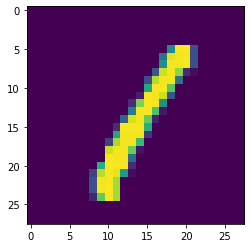

9


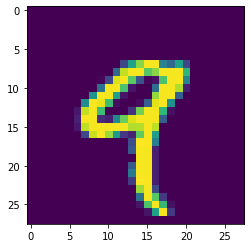

2


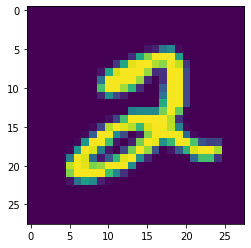

1


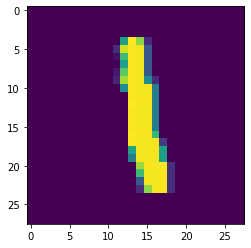

3


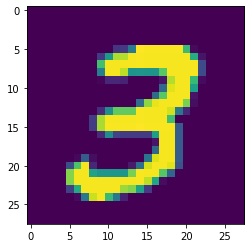

1


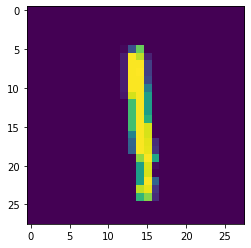

4


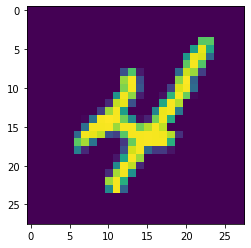

3


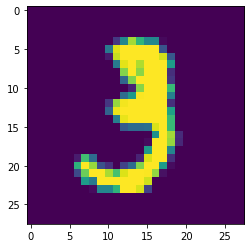

In [135]:
for i in range(0,11):
    print(y_train[i])
    plt.imshow(X_train[i])
    plt.show()

In [136]:
X_train = X_train / 255
X_test = X_test / 255

In [137]:
## Convert 28 x 28 image into single dim(flatten)
X_train_flatten = X_train.reshape(len(X_train),28*28)

In [138]:
X_train_flatten.shape

(60000, 784)

In [139]:
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [140]:
X_test_flatten.shape

(10000, 784)

## Create Model

In [141]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100,activation="relu"),
    Dense(50,activation="relu"),
    Dense(25,activation="relu"),
    Dense(10,activation="sigmoid")
])

In [142]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    #loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [145]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0499 - accuracy: 0.9842
Epoch 2/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0399 - accuracy: 0.9876 0s - loss: 0.0389 
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0355 - accuracy: 0.9887
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0296 - accuracy: 0.9902
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0280 - accuracy: 0.9911
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0249 - accuracy: 0.9920
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0230 - accuracy: 0.9922
Epoch 8/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0200 - accuracy: 0.9935
Epoch 9/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0175 - accuracy: 0.9941
Epoch 10/10
60000/60000 [===========

In [147]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 23us/step


[0.12372702768566378, 0.972599983215332]

In [149]:
y_pred = model.predict(X_test)

[1.4979675e-09 2.8968999e-10 2.0513340e-08 2.5496036e-07 2.9228020e-14
 4.2357874e-11 1.8737721e-13 9.9224550e-01 7.4944501e-10 9.1070644e-09]
7


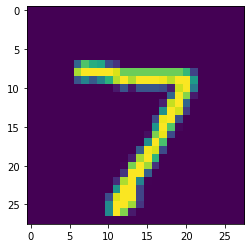

In [150]:
plt.imshow(X_test[0])
print(y_pred[0])
print(np.argmax(y_pred[0]))

In [151]:
y_predictions = [np.argmax(x) for x in y_pred]

In [152]:
print(y_test[0])
print(y_pred[0])
print(y_predictions[0])

7
[1.4979675e-09 2.8968999e-10 2.0513340e-08 2.5496036e-07 2.9228020e-14
 4.2357874e-11 1.8737721e-13 9.9224550e-01 7.4944501e-10 9.1070644e-09]
7


In [153]:
tf.math.confusion_matrix(y_test,y_predictions)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    3,    0,    3,    1,    4,    2,    0,    1],
       [   0, 1125,    7,    0,    0,    1,    1,    0,    1,    0],
       [   3,    0, 1016,    2,    1,    0,    2,    6,    2,    0],
       [   0,    0,    8,  992,    0,    2,    1,    4,    0,    3],
       [   0,    1,    4,    0,  962,    0,    5,    3,    0,    7],
       [   2,    0,    1,   15,    3,  864,    4,    1,    1,    1],
       [   4,    2,    2,    2,    3,    5,  940,    0,    0,    0],
       [   1,    2,   11,    4,    1,    0,    0, 1004,    1,    4],
       [   2,    1,   25,   21,    5,    9,    4,    6,  899,    2],
       [   2,    5,    2,    7,   11,    6,    2,   13,    3,  958]])>

In [154]:
import seaborn as sns

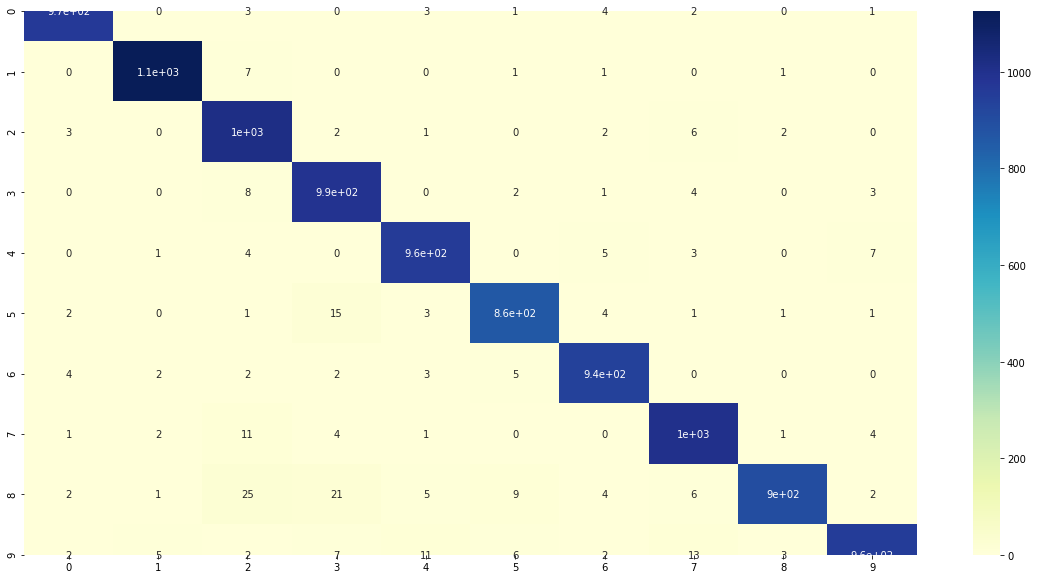

In [158]:
plt.figure(figsize=(20,10))
cm = tf.math.confusion_matrix(y_test,y_predictions)
sns.heatmap(cm,annot=True,cmap="YlGnBu")